# Singular Spectrum Analysis

## Original formulation

REF: https://en.wikipedia.org/wiki/Singular_spectrum_analysis

Aditional REF: https://www.sciencedirect.com/science/article/abs/pii/S105120041830530X

In [1]:
import numpy as np
import soundfile as sf
from scipy.linalg import svd
from scipy.stats import zscore

import matplotlib.pyplot as plt
%matplotlib inline

### Loading signal

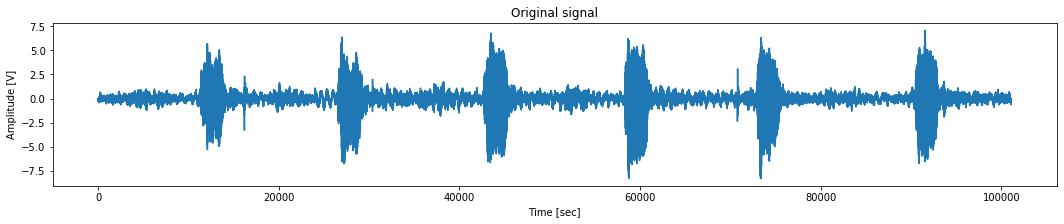

In [2]:
# load bioacoustic signal (an anuran call recorded into the rainforest)
x, fs = sf.read('hylaedactylus_1_44khz.flac') 
x = zscore(x) # signal nomalization

plt.figure(figsize=(18,3))
plt.plot(x)
plt.ylabel('Amplitude [V]')
plt.xlabel('Time [sec]')
plt.title('Original signal')
plt.show()

### Step 1: embedding

In [3]:
L = 20 # time lag for the autocorrelation matrix
N = len(x) 
K = N-L+1
X = np.zeros((L,K))

for i in range(L):
    X[i,:] = x[i:K+i] # building trajectory matrix
    
print("Dimensions of trajectory matrix (x,y):", X.shape) # dimensions of trajectory matrix

Dimensions of trajectory matrix (x,y): (20, 101102)


### Step 2: SVD of the autocorrelation matrix

In [4]:
S = np.dot(X,X.T) # Equivalent to autocorrelation matrix 
U, d, _ = svd(S)  # decomposition
V = np.dot(X.T,U)

#### Singular spectrum visualization

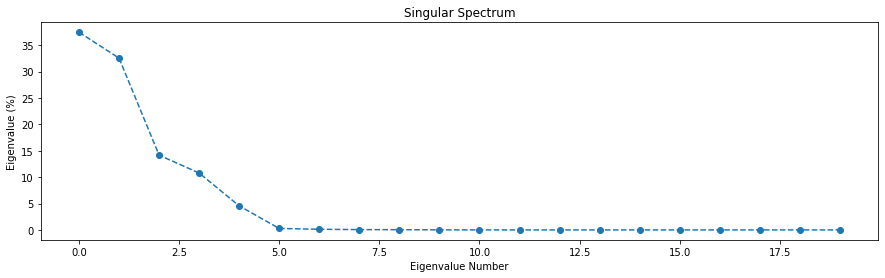

In [5]:
plt.figure(figsize=(15,4))
plt.plot((d/np.sum(d))*100,'--o') # d => eigenvalues, Normalized singular spectrum
plt.title('Singular Spectrum')
plt.xlabel('Eigenvalue Number')
plt.ylabel('Eigenvalue (%)')
plt.show()

### Step 3: grouping

In [6]:
c = [0,1,2,3]  # Selection of components to generate the reconstruction.
Vt = V.T
rca = np.dot(U[:,c],Vt[c,:])

### Step 4: reconstruction

In [7]:
X_hat = np.zeros((L,N))

for i in range(L): 
    X_hat[i,i:K+i] = rca[i,:] # instead of averaging diagonals, we make a shift and take the averages by columns.

y = np.mean(X_hat, axis=0)    # final reconstruction

RMS Error:  44.59981698962357


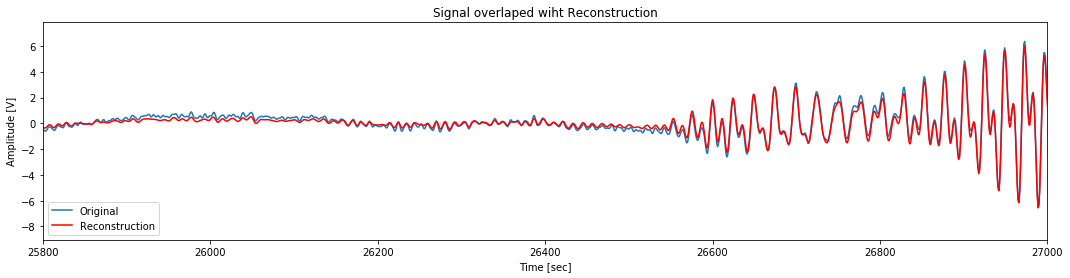

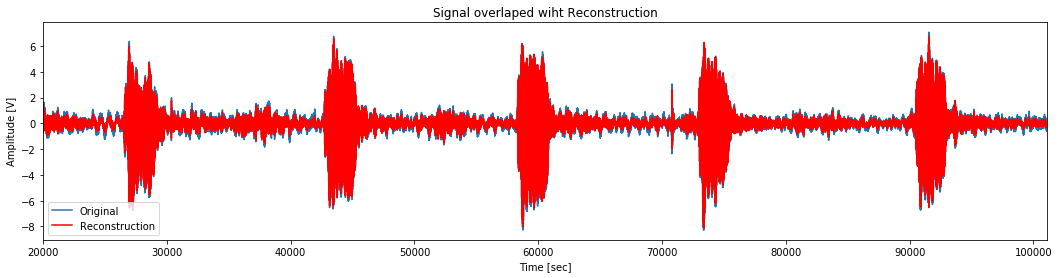

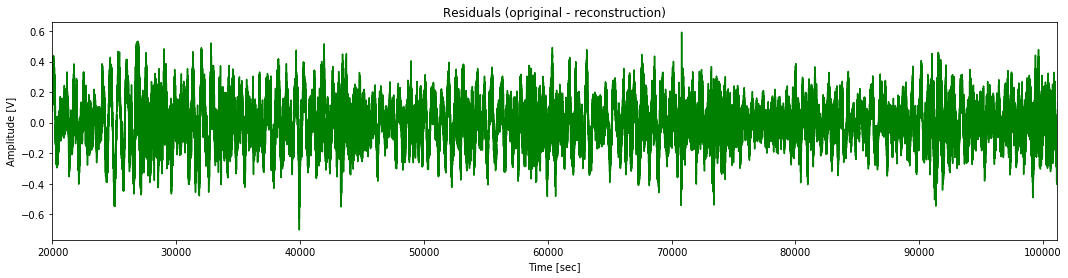

In [8]:
print('RMS Error: ',np.sqrt(np.sum(np.power(x-y,2))))

plt.figure(figsize=(18,4))
plt.plot(x, label='Original')
plt.plot(y, 'red', label='Reconstruction')
plt.xlim([25800,27000])
plt.ylabel('Amplitude [V]')
plt.xlabel('Time [sec]')
plt.title('Segment of signal overlaped wiht Reconstruction')
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(18,4))
plt.plot(x, label='Original')
plt.plot(y,'red', label='Reconstruction')
plt.xlim([20000,len(x)])
plt.ylabel('Amplitude [V]')
plt.xlabel('Time [sec]')
plt.title('Signal overlaped wiht Reconstruction')
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(18,4))
plt.plot(x-y,'green')
plt.xlim([20000,len(x)])
plt.ylabel('Amplitude [V]')
plt.xlabel('Time [sec]')
plt.title('Residuals (opriginal - reconstruction)')
plt.show()

### Example of reconstruction with a single component.

In [9]:
# Step 3: selection
c = [4] # Only component 5
Vt = V.T
rca = np.dot(U[:,c],Vt[c,:])

# Step 4: Reconstruction
X_hat = np.zeros((L,N))

for i in range(L):
    X_hat[i,i:K+i] = rca[i,:]
    
y = np.mean(X_hat, axis=0)

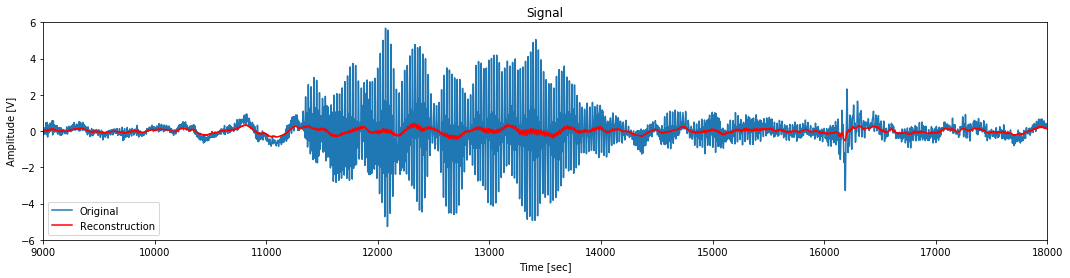

In [11]:
plt.figure(figsize=(18,4))
plt.plot(x, label='Original')
plt.plot(y,'red', label='Reconstruction')
plt.xlim([9000,18000])
plt.ylim([-6,6])
plt.ylabel('Amplitude [V]')
plt.xlabel('Time [sec]')
plt.title('Signal')
plt.legend(loc='lower left')
plt.show()